<div style="background:	#dcdcdc;">
    <h1 style="text-align:center;"> Store Sale Predictions</h1>
<h2 style="text-align:center;">steps:</h2>
 <div style="text-align:center;">  
<li >
    Data loading <strong>done</strong> </li>
      <li>  Data Observing(get Insights from data) <strong>done</strong> <br></li> 
  <li>  Observe the datset and get insights from dataset<br></li>
   <li> cleaning & Imputing<br></li>
   <li> Visualization after cleaning<br></li>
   <li> Feature Scalling<br></li>
  <li>  Model building<br></li>
   <li> Model Fit and Train<br></li>
  <li>  Evalutaing model<br></li>
    </div>
 </div>   

<h1 style="color:Red;text-align:center;"> Loading neccessary libraries</h1>
<h1 style="color:Red;text-align:center;"></h1>

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



<h1 style="color:Red;text-align:center;">read the data</h1>

In [112]:
dtrain = pd.read_csv('Train.csv')
dtest = pd.read_csv('Test.csv')

Shape of both train and test dataframes

In [113]:
dtrain.shape,dtest.shape

((8523, 12), (5681, 11))

<p style="color:Green">we got 12 columns in train set(including dependent variable), 11 column in test set<br><br><br>

In [114]:
print(dtrain.columns)
dtest.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

<br><br><br>

In [115]:
dtrain.info(), dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

<p style="color:Green">there is no non-null type colums

<br><br>

In [116]:
dtrain.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<br>

In [117]:
dtrain.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [118]:

dtest.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<br><br><div style="background:	#dcdcdc;text-align:center;">

<h3 style="text-align:center;" >Item_Weight, Outlet_Size columns having null values in both train and test data</h3>

<ul style="text-align:center;">meathods to impute </ul>
<li> mean meathod</li>
<li> median meathod </li>
<li> mode meathod</li>
 </div>


In [119]:
print("type of outlet:",dtrain.dtypes['Outlet_Size'])
print("type of Item_Weight:",dtrain.dtypes['Item_Weight'])

type of outlet: object
type of Item_Weight: float64


<p style="color:Green; text-align:center;">as we can see, outlet is categorical column, se we cant apply mean , median meathod <br>
Mode meathod will give better results<br>
lets apply mode meathod for column Outlet_Size
    <br><br>

In [120]:
dtrain['Outlet_Size']= dtrain['Outlet_Size'].fillna(dtrain['Outlet_Size'].mode()[0])
dtest['Outlet_Size']= dtest['Outlet_Size'].fillna(dtest['Outlet_Size'].mode()[0])

<p style="color:Green ; text-align:center;">Now lets see about Item_Weight<br>
Lets plot a box plot and see if there is any outliers(if outliers present, mean meathod is not suitable)

<AxesSubplot:xlabel='Item_Weight'>

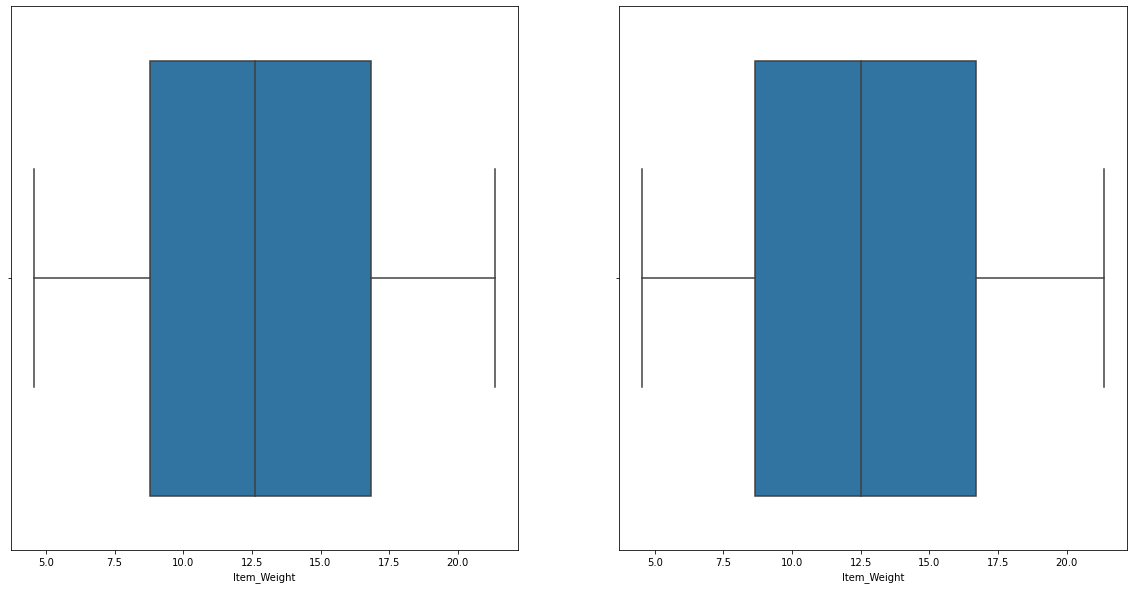

In [121]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot('Item_Weight',data=dtrain)
plt.subplot(1,2,2)
sns.boxplot('Item_Weight',data=dtest)

<strong> <h1>as we can see , there is no outlier, so mean meathon could be better <br><br>

In [122]:
dtrain['Item_Weight']= dtrain['Item_Weight'].fillna(dtrain['Item_Weight'].mean())
dtest['Item_Weight']= dtest['Item_Weight'].fillna(dtest['Item_Weight'].mean())

<p style="color:Green">Now lets look at null values

In [123]:
dtrain.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [124]:
dtrain.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [125]:
dtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<br><br><br><br><br><br><br>
<h1 style="color:Red; text-align: center">Univariate analysis<br> Lets check each column and understand the data</h1>


Lets check all column unique items one by one

In [126]:
for x in dtrain.columns:
    print("")
    print("total unique values of",x,"column",dtrain[x].nunique())

    print(dtrain[x].value_counts())


total unique values of Item_Identifier column 1559
FDG33    10
FDW13    10
DRE49     9
FDW49     9
NCQ06     9
         ..
FDE52     1
FDT35     1
FDY43     1
FDO33     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

total unique values of Item_Weight column 416
12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
5.735000        2
7.685000        1
9.420000        1
5.400000        1
6.520000        1
Name: Item_Weight, Length: 416, dtype: int64

total unique values of Item_Fat_Content column 5
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

total unique values of Item_Visibility column 7880
0.000000    526
0.076975      3
0.072238      2
0.080766      2
0.058543      2
           ... 
0.024343      1
0.041823      1
0.023154      1
0.047783      1
0.031007      1
Name: Item_Visibility, Length: 7880, dtype: int64

total unique values of Item_Ty

There are 1559 unique Values

<h1 style="color:red">Item_fat_Content

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
5


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

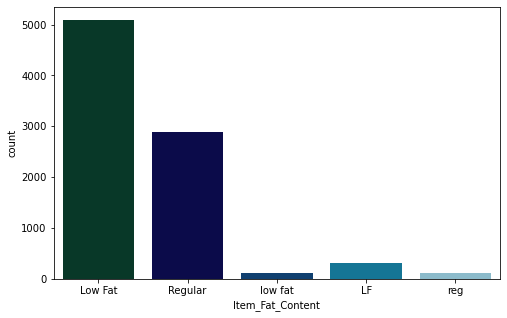

In [127]:
print(dtrain['Item_Fat_Content'].unique())
print(dtrain['Item_Fat_Content'].nunique())
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=dtrain,palette='ocean')
dtrain['Item_Fat_Content'].value_counts()

<p style="color:red">We can see the Lowfat is registerd as 2 extra values 'low fat', 'lf'...<br>
and Regular also have a duplicate name as reg..
lets replace those

In [128]:
dtrain['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
dtest['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [129]:
pd.unique(dtrain['Item_Fat_Content'])
pd.unique(dtest['Item_Fat_Content'])

array(['Low Fat', 'Regular'], dtype=object)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

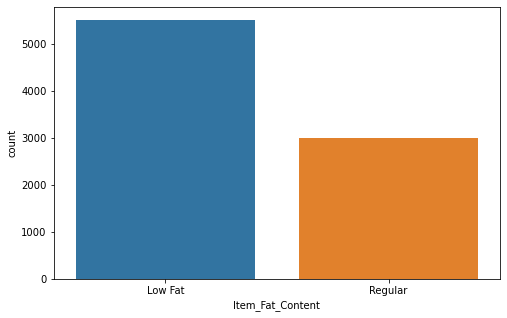

In [130]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=dtrain)

We can see low fat items have higher numbers the regular in dataset <br><br>

<h1 style="color:red">Item_Weight

In [131]:

print(dtrain['Item_Weight'].nunique())
#plt.figure(figsize=(8,5))
#sns.countplot('Item_Weight',data=dtrain,palette='ocean')
dtrain['Item_Weight'].value_counts()

416


12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
5.735000        2
7.685000        1
9.420000        1
5.400000        1
6.520000        1
Name: Item_Weight, Length: 416, dtype: int64

416 unique weight values we have here

<br><br>

<h1 style="color:red"> Outlet_Establishment_Year

In [132]:
print(dtrain['Outlet_Establishment_Year'].unique())
print(dtrain['Outlet_Establishment_Year'].nunique())

[1999 2009 1998 1987 1985 2002 2007 1997 2004]
9


Lets turn Year into no.of years, which will help our prediction

In [133]:
dtrain['Outlet_Establishment_Year']=dtrain['Outlet_Establishment_Year'].apply(lambda x: 2021-x)

In [134]:
dtest['Outlet_Establishment_Year']=dtest['Outlet_Establishment_Year'].apply(lambda x: 2021-x)

In [135]:
print(dtrain.groupby(['Outlet_Establishment_Year','Outlet_Identifier']))

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

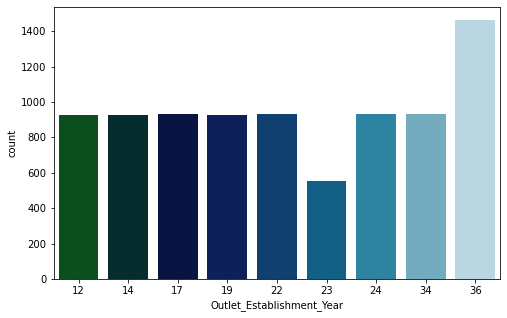

In [136]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Establishment_Year',data=dtrain,palette='ocean')

It can see, maximum all equal number of outlets are establish in every year from dataset except 23,36 years back

<h1 style="color:red">Outlet_Identifier

In [137]:
print(dtrain['Outlet_Identifier'].unique())
print(dtrain['Outlet_Identifier'].nunique())

dtrain['Outlet_Identifier'].value_counts()

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
10


OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

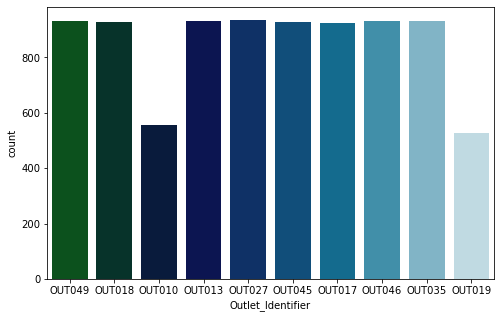

In [138]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Identifier',data=dtrain,palette='ocean')

exetp out18,out19, number of items present in dataset of each outlet are same

<h1 style="color:red">Outlet_Size

In [139]:
print(dtrain['Outlet_Size'].unique())
print(dtrain['Outlet_Size'].nunique())

dtrain['Outlet_Size'].value_counts()

['Medium' 'High' 'Small']
3


Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

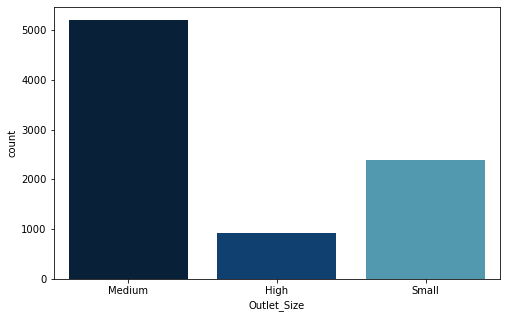

In [140]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=dtrain,palette='ocean')

Items from medium size outlets are more in dataset

<h1 style="color:red">Outlet_Type

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

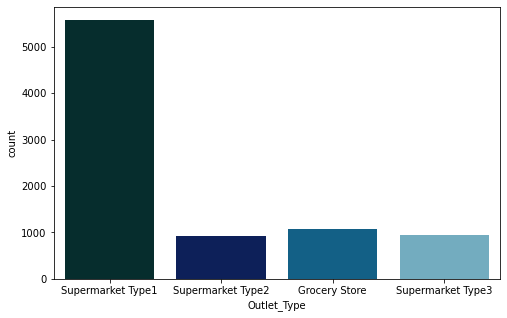

In [141]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=dtrain,palette='ocean')

<h1 style="color:red">lets check correlation

In [142]:
dtrain.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,-0.005020,0.567574
Outlet_Establishment_Year,0.008301,0.074834,-0.005020,1.000000,0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,0.049135,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

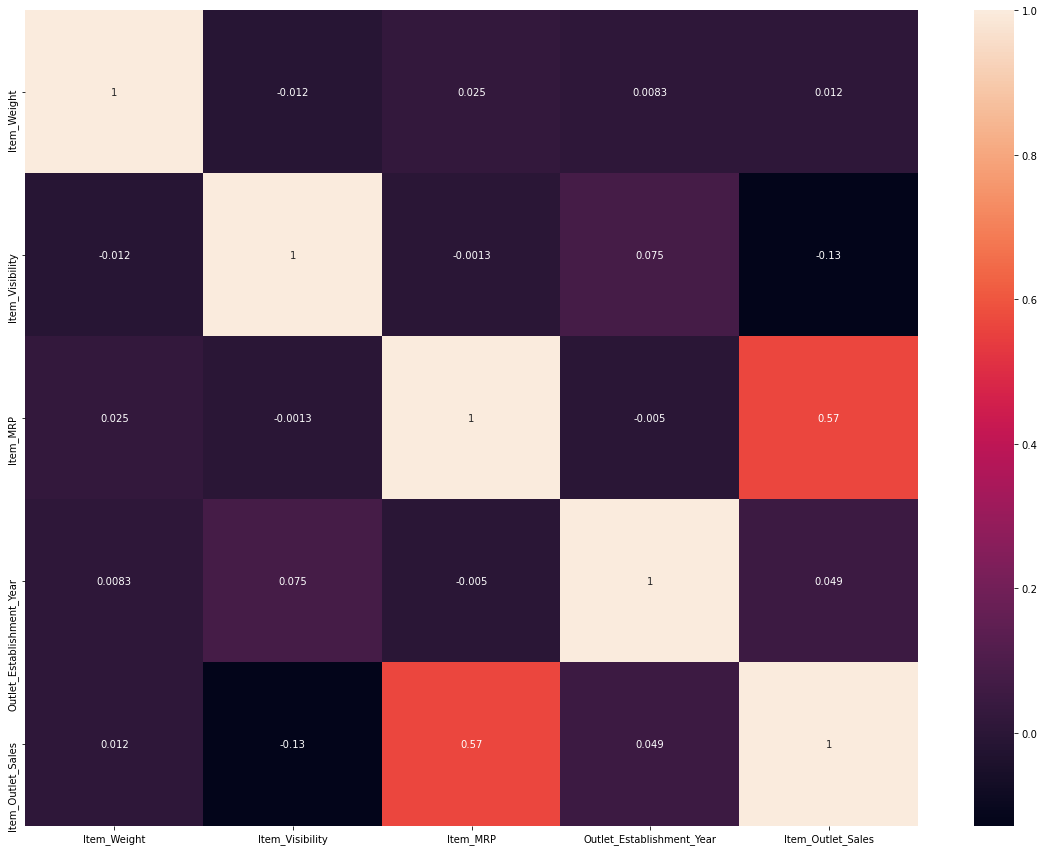

In [143]:
plt.figure(figsize=(20,15))
sns.heatmap(dtrain.corr(), annot=True)
plt.show

<h1 style="color:Red;text-align: center;">Bilater analysis</h1>

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

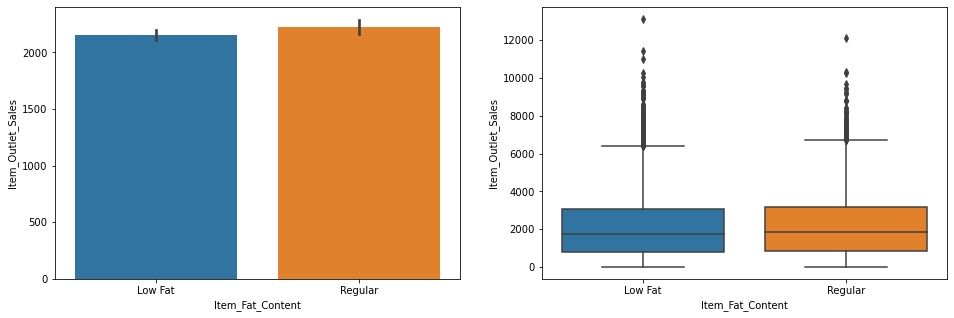

In [144]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=dtrain)
plt.subplot(1,2,2)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=dtrain)

Sales for both regualr and low fat have almost equal , but remeber, we have more number of low fat items in dataset

<br><br><br>

<br><br><br>

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

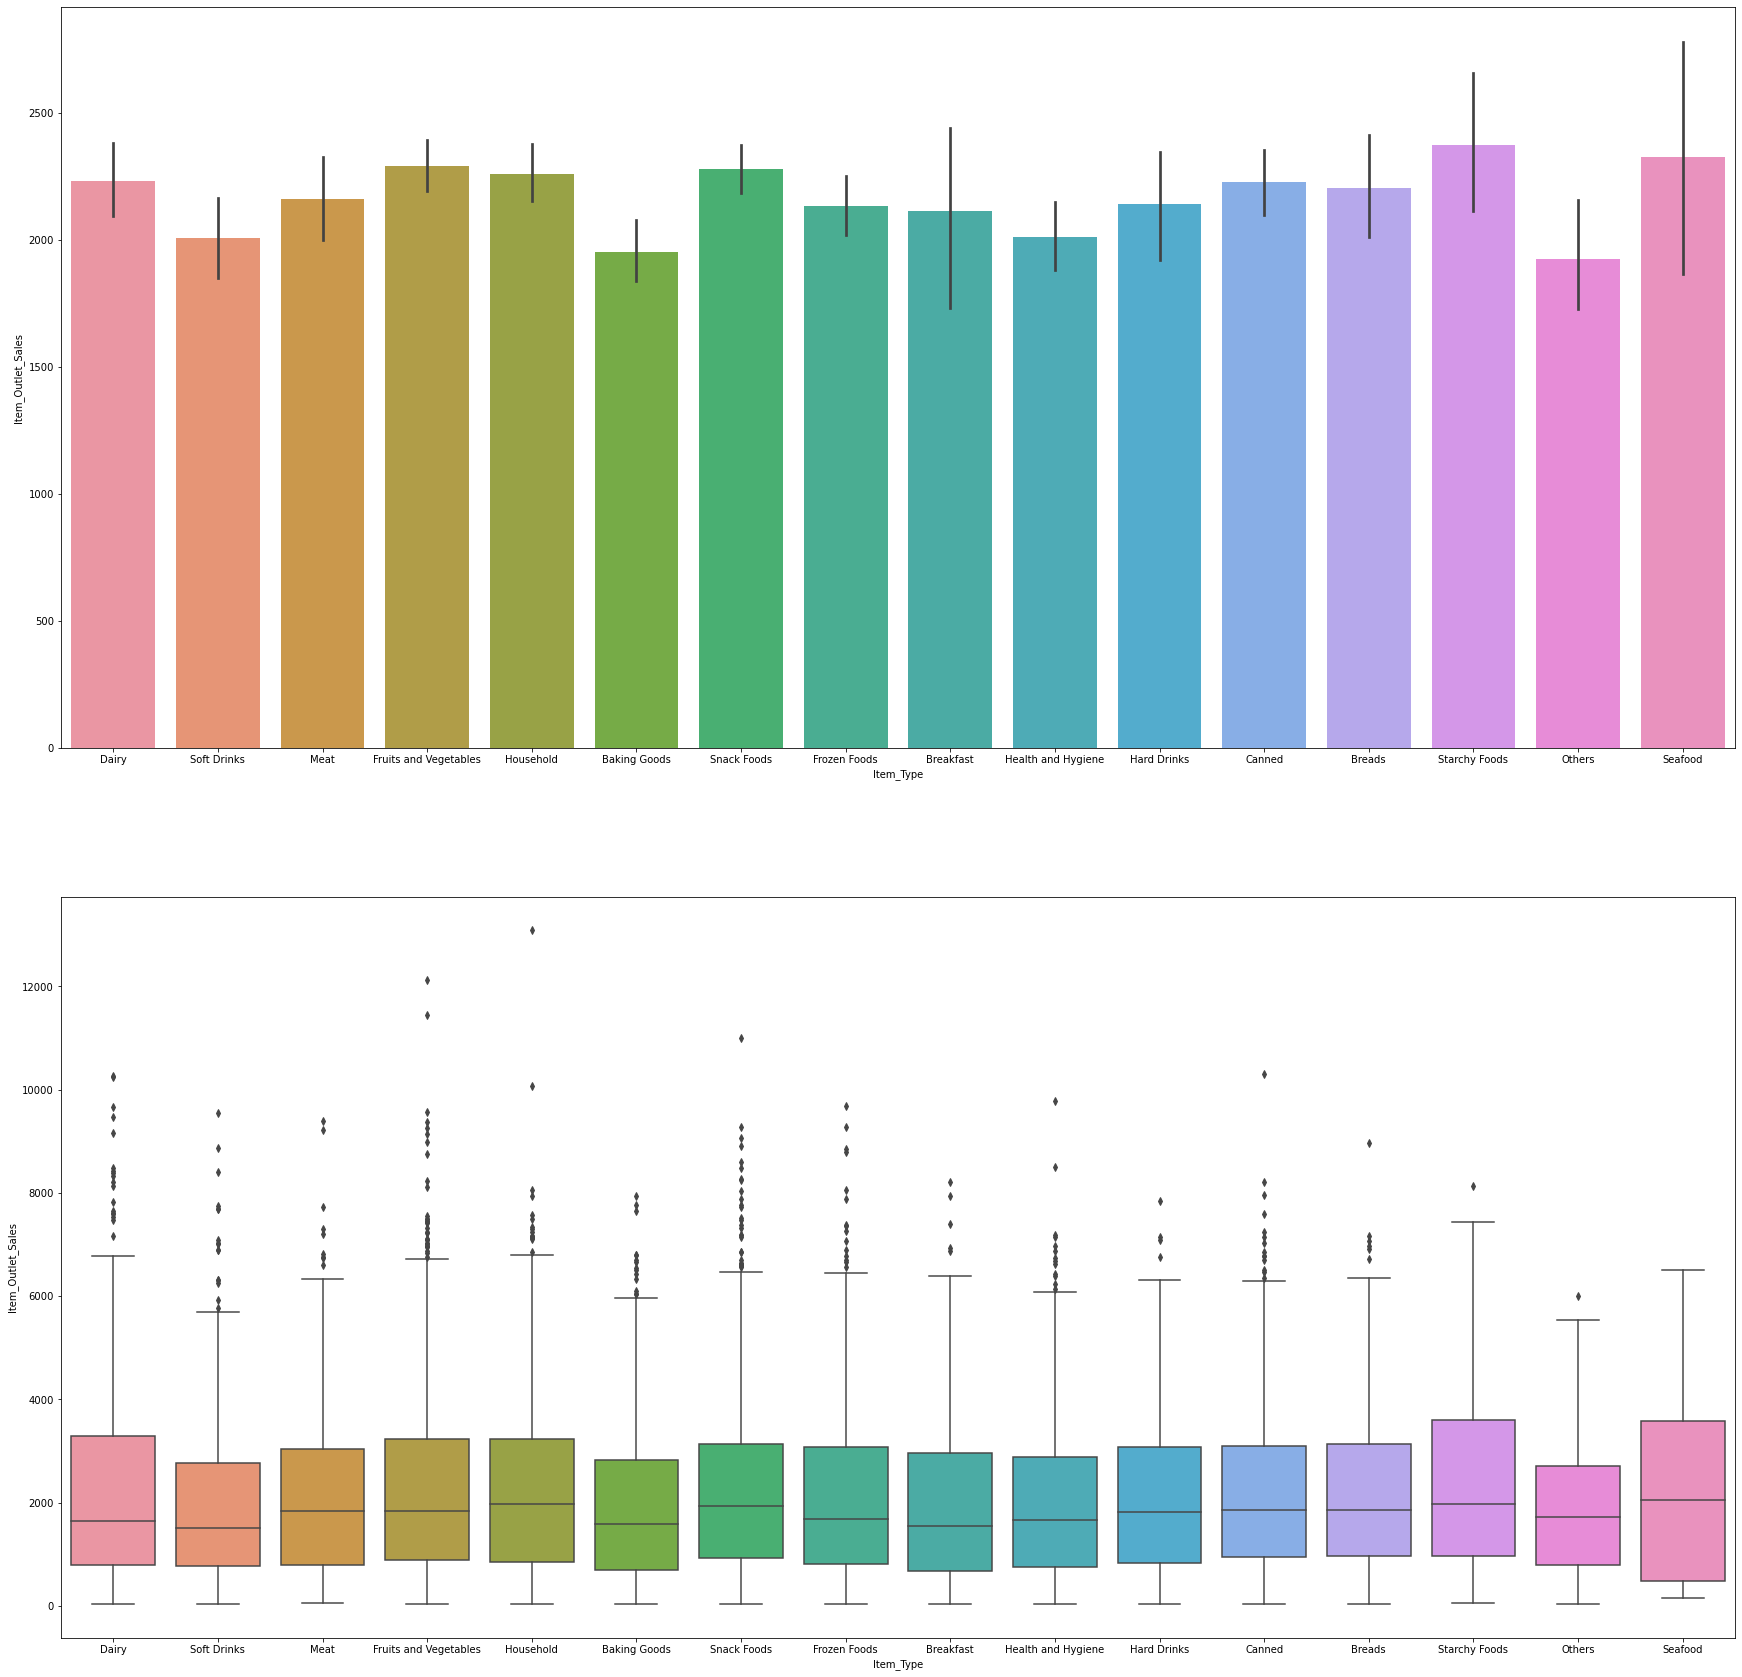

In [145]:
plt.figure(figsize=(30,30))
plt.subplot(2,1,1)
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=dtrain)
plt.subplot(2,1,2)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=dtrain)

All Item types have same sales, and except seafood, we can see outliers for every type
<br><br><br><br><br><br>

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

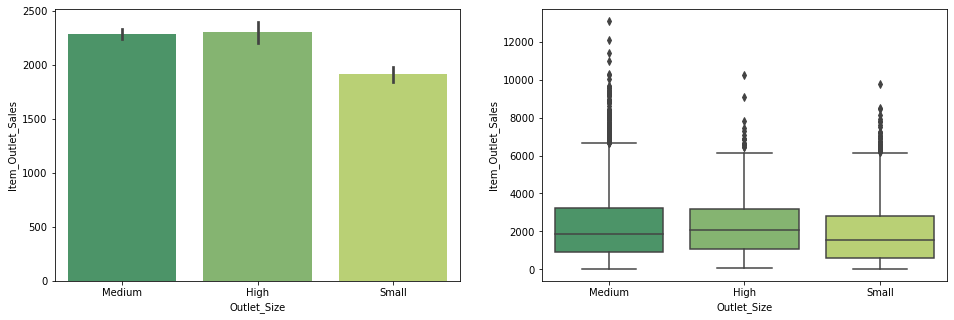

In [146]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=dtrain,palette='summer')
plt.subplot(1,2,2)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=dtrain,palette='summer')

we can see,small size outlets have slight less sales.ipynb<br><br><br><br><br><br>

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

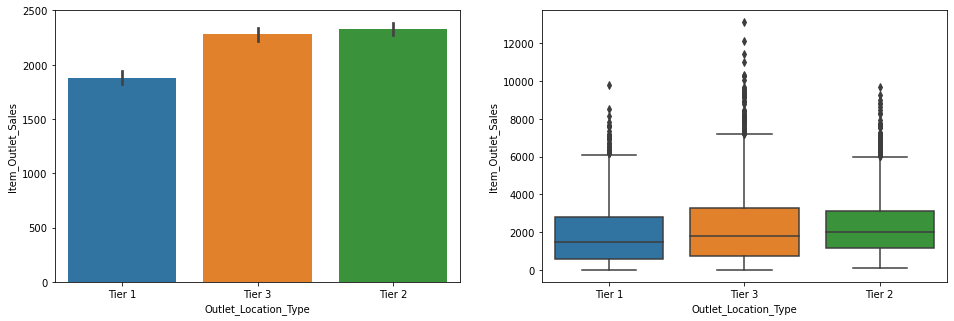

In [147]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=dtrain,palette='tab10')
plt.subplot(1,2,2)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=dtrain,palette='tab10')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

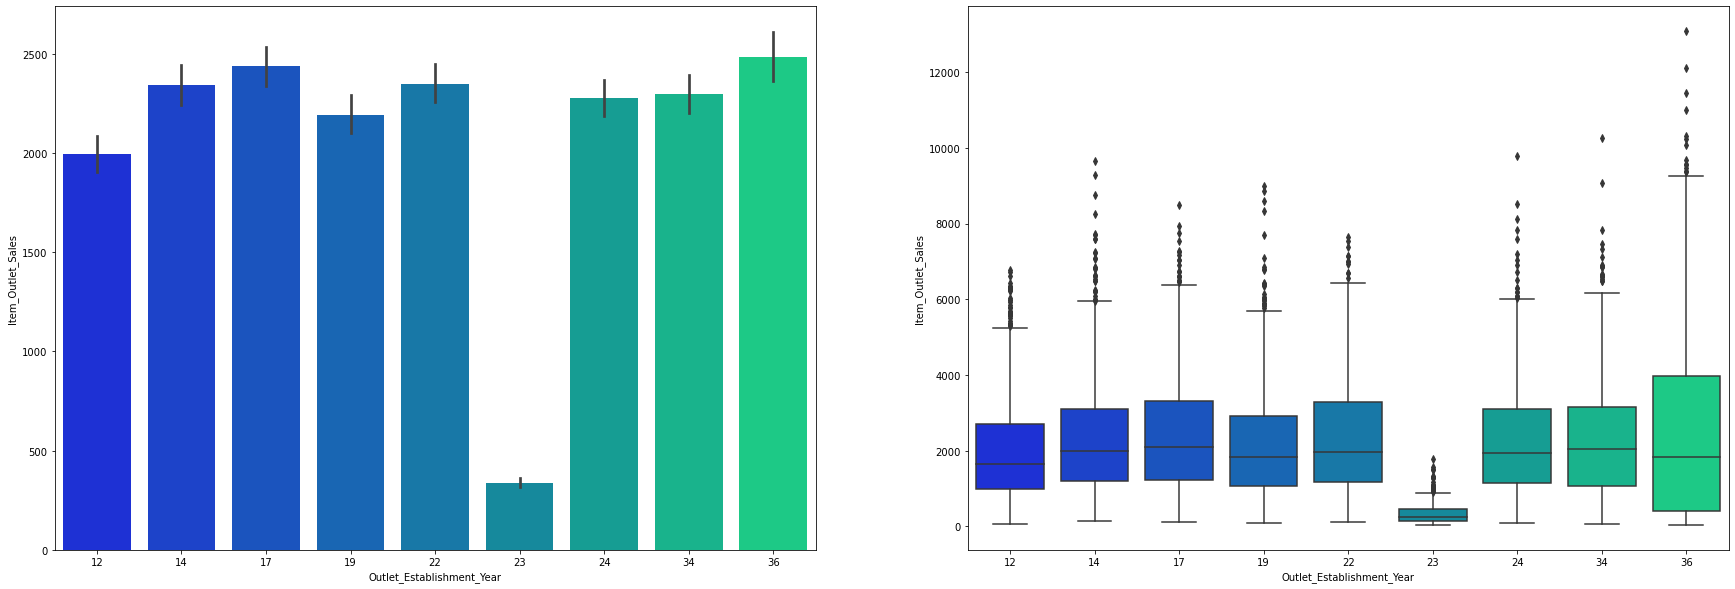

In [148]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=dtrain,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=dtrain,palette='winter')

Text(0, 0.5, 'Item_Outlet_Sales')

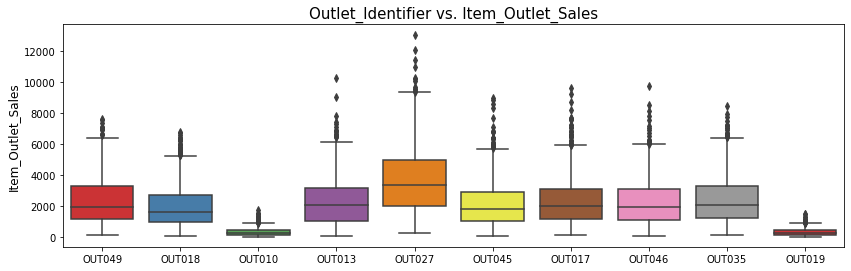

In [149]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=dtrain, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

<br><br><br><br><br><br><br>
<h1 style="color:Red; text-align: center">Featur Engineerimg</h1>

In [150]:
dtrain.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,22,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,12,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,22,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,23,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,34,High,Tier 3,Supermarket Type1,994.7052


In [151]:
dtest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,22,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,14,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,23,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,14,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,36,Medium,Tier 3,Supermarket Type3



dtrain=dtrain.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
dtrain.head()

In [152]:
dtrain['Item_Type_Combined'] = dtrain['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
dtrain['Item_Type_Combined'] = dtrain['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
dtest['Item_Type_Combined'] = dtest['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
dtest['Item_Type_Combined'] = dtest['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
dtrain['Item_Type_Combined'].value_counts()
dtrain['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

dtest.head()

dtrain.head()

In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dtrain['Outlet'] = le.fit_transform(dtrain['Outlet_Identifier'])
dtest['Outlet'] = le.fit_transform(dtest['Outlet_Identifier'])
var_mod = [ 'Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    dtrain[i] = le.fit_transform(dtrain[i])
    dtest[i] = le.fit_transform(dtest[i])

dtrain.dtypes

In [154]:

dtrain = pd.get_dummies(dtrain, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet'])
dtest = pd.get_dummies(dtest, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet'])

In [155]:
dtrain.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,22,3735.1380,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,12,443.4228,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,22,2097.2700,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,23,732.3800,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,34,994.7052,1,0,...,0,1,0,0,0,0,0,0,0,0


In [156]:
dtrain.drop(['Item_Type','Outlet_Establishment_Year','Item_Identifier','Item_Type','Outlet_Identifier'],axis=1,inplace=True)
dtest.drop(['Item_Type','Outlet_Establishment_Year','Item_Identifier','Item_Type','Outlet_Identifier'],axis=1,inplace=True)
#y_train= dtrain['Item_Outlet_Sales']

#dtrain.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [157]:
dtrain.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,3735.1380,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,732.3800,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [159]:
features1=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']

In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


dtrain[features1] = scaler.fit_transform(dtrain[features1])

In [161]:
features2=['Item_Weight','Item_Visibility','Item_MRP']
dtest[features2] = scaler.fit_transform(dtest[features2])

In [162]:
dtest.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0.964275,0.023374,0.323413,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.222983,0.118737,0.235849,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.598095,0.307674,0.894140,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0.164335,0.047548,0.524488,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0.484706,0.366458,0.862069,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [163]:
y_train= dtrain['Item_Outlet_Sales']

dtrain.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [164]:
y_train.head()

0    0.283587
1    0.031419
2    0.158115
3    0.053555
4    0.073651
Name: Item_Outlet_Sales, dtype: float64

In [165]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn.metrics import mean_squared_error

In [166]:
features=dtrain.columns


In [167]:
LR = LinearRegression(normalize=True)
LR.fit(dtrain,y_train)
y_pred = LR.predict(dtrain)
coef2 = pd.Series(LR.coef_,features).sort_values()


In [168]:
y_train.head()

0    0.283587
1    0.031419
2    0.158115
3    0.053555
4    0.073651
Name: Item_Outlet_Sales, dtype: float64

coef2

In [169]:
print("constant",LR.intercept_)
#LR.score(dtrain, y_train)
print("rsquare",metrics.r2_score(y_train,y_pred))
print("mse",metrics.mean_squared_error(y_train,y_pred))
print("rmse",np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print("mae",metrics.mean_absolute_error(y_train,y_pred))
print("coefficents",LR.coef_)



constant -1868785581379.9653
rsquare 0.5634566578488078
mse 0.007459731943012483
rmse 0.08636973974148865
mae 0.06404161984681771
coefficents [-1.03570284e-03 -8.78741610e-03  2.80315695e-01  1.47488550e+10
  1.47488550e+10  1.11619072e+12 -2.68250073e+11 -9.84371619e+11
  4.23973014e+11  1.53350827e+12  1.71696804e+12 -2.74253586e+09
 -2.74253586e+09 -2.74253586e+09  6.62322446e+11  1.18708240e+12
  4.98017179e+11  6.53821308e+11  6.45320171e+11  1.23009546e+12
 -5.95561333e+11  8.09625438e+11 -1.63870194e+12  6.53821308e+11
 -7.79021103e+11 -5.95561333e+11 -2.16346189e+12 -1.98000212e+12]


In [176]:
out=pd.DataFrame(data=y_pred,columns=['y_pred'])
out['y_train']=y_train
out.head()

,y_pred,y_train
0,0.307129,0.283587
1,0.042480,0.031419
2,0.178223,0.158115
3,0.076172,0.053555
4,0.068359,0.073651


In [177]:
res = y_train-y_pred
res.head()

0   -0.023542
1   -0.011062
2   -0.020108
3   -0.022617
4    0.005292
Name: Item_Outlet_Sales, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

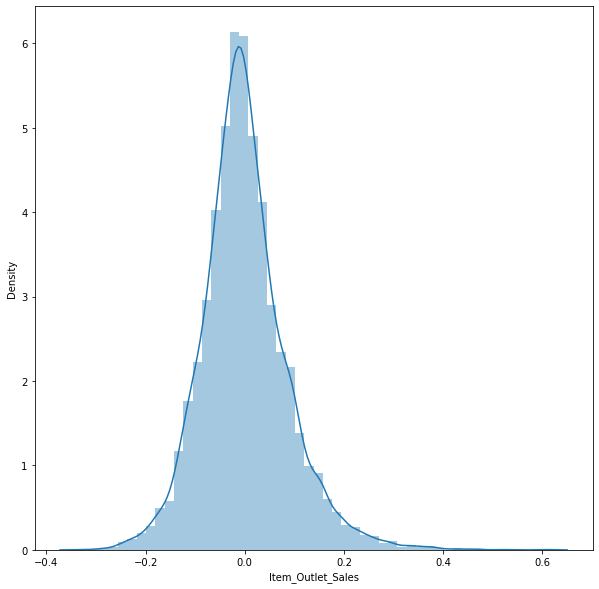

In [109]:
plt.figure(figsize=(10,10))
sns.distplot(res)
plt.show

Text(0, 0.5, 'y_pred')

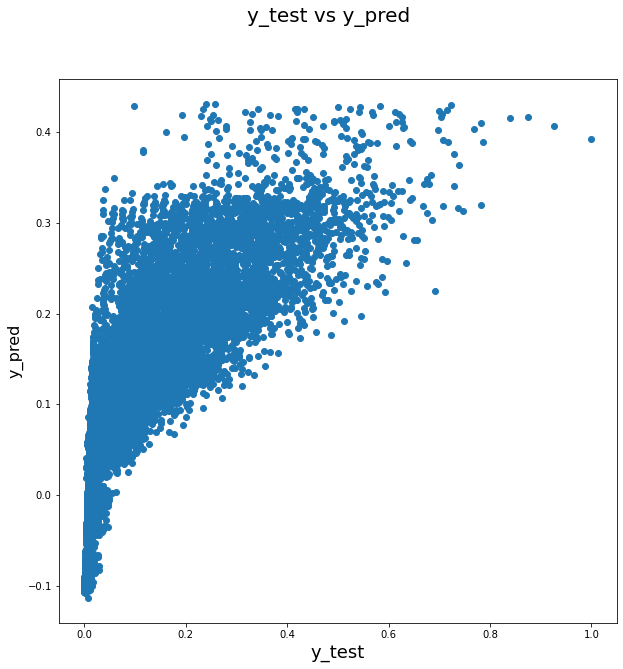

In [178]:
fig = plt.figure(figsize=(10,10))
plt.scatter(y_train, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

<br>

<br>

<AxesSubplot:>

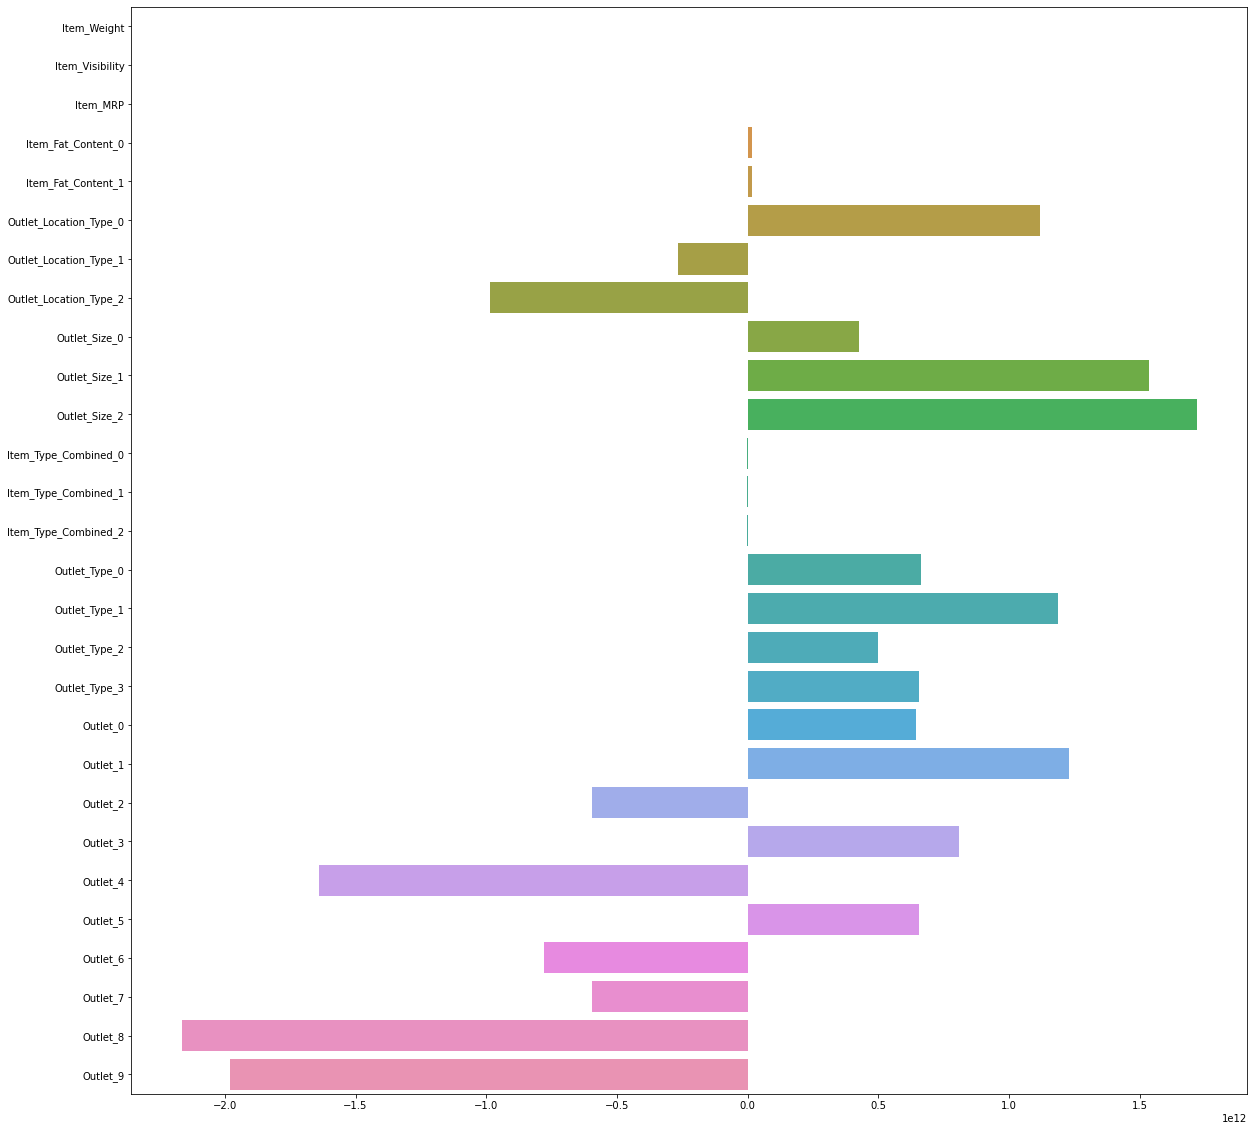

In [183]:
plt.figure(figsize=(20,20))
sns.barplot(LR.coef_,features)

In [184]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor

In [185]:
tree_reg = DecisionTreeRegressor(max_depth=6).fit(dtrain, y_train)
print("The model training score is" , tree_reg.score(dtrain, y_train))

The model training score is 0.612174482009078


In [191]:
out2=tree_reg.predict(dtrain)

In [186]:
dtcoef = pd.Series(tree_reg.feature_importances_, features).sort_values(ascending=False)

In [196]:
out2

array([0.32050221, 0.05525694, 0.15443693, ..., 0.1008316 , 0.12189511,
       0.0819613 ])

In [211]:

#LR.score(dtrain, y_train)
print("rsquare",metrics.r2_score(y_train,out2))
print("mse",metrics.mean_squared_error(y_train,out2))
print("rmse",np.sqrt(metrics.mean_squared_error(y_train, out2)))
print("mae",metrics.mean_absolute_error(y_train,out2))
print("mean:",np.mean(np.sqrt(np.abs(tree_reg.score(dtrain, y_train)))))

rsquare 0.612174482009078
mse 0.006627232912580437
rmse 0.08140781849785951
mae 0.05695840178688073
mean: 0.7824157986704243


<AxesSubplot:>

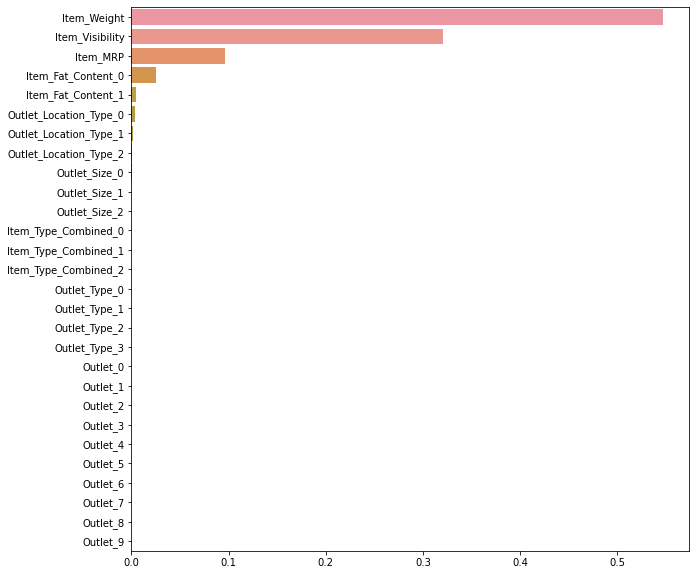

In [212]:
plt.figure(figsize=(10,10))
sns.barplot(dtcoef,features)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

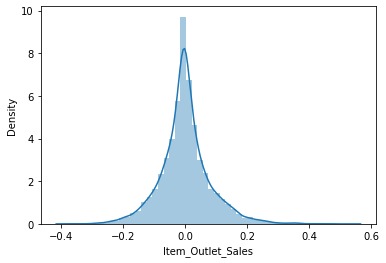

In [200]:
sns.distplot(y_train-out2)

<h1 style="color:Red; text-align:center;"> decision tree model has better rmse , its better then linear regression, but the coeeficents magnitude has large differences</h1>

In [214]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
from sklearn.model_selection import RandomizedSearchCV

In [215]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [216]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [217]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [218]:
rf_random.fit(dtrain, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  28.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6,
                                                   min_samples_leaf=100,
                                                   n_estimators=400, n_jobs=4),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_err

In [225]:
outrf=rf_random.predict(dtrain)

In [227]:
outrf

array([0.33286563, 0.05132159, 0.17650493, ..., 0.10181601, 0.11468476,
       0.08780704])

In [229]:
y_pred

array([0.30712891, 0.04248047, 0.17822266, ..., 0.11328125, 0.10595703,
       0.09155273])

In [230]:
print("rsquare",metrics.r2_score(y_train,outrf))
print("mse",metrics.mean_squared_error(y_train,outrf))
print("rmse",np.sqrt(metrics.mean_squared_error(y_train, outrf)))
print("mae",metrics.mean_absolute_error(y_train,outrf))
print("mean:",np.mean(np.sqrt(np.abs(tree_reg.score(dtrain, y_train)))))

rsquare 0.646668246138425
mse 0.006037797204221128
rmse 0.07770326379387887
mae 0.054316990383125374
mean: 0.7824157986704243


In [231]:
resrf= y_train-outrf

<function matplotlib.pyplot.show(close=None, block=None)>

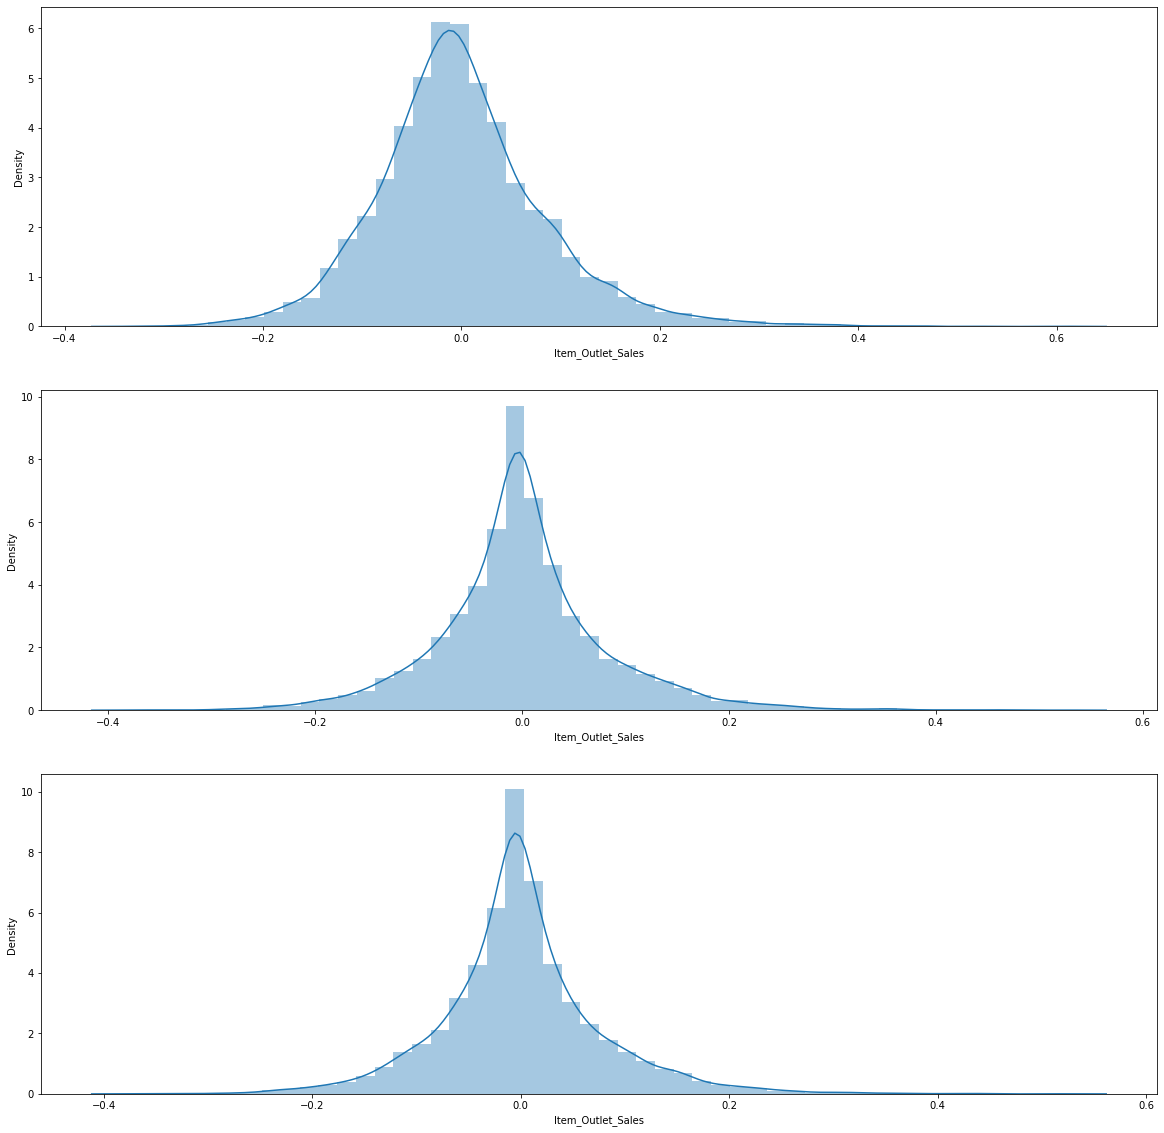

In [238]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.distplot(res)
plt.subplot(3,1,2)
sns.distplot(y_train-out2)
plt.subplot(3,1,3)
sns.distplot(resrf)
plt.show

In [239]:
print("rsquare of linear",metrics.r2_score(y_train,y_pred))
print("rsquare of decision tree",metrics.r2_score(y_train,out2))
print("rsquare of random forest",metrics.r2_score(y_train,outrf))

rsquare of linear 0.5634566578488078
rsquare of decision tree 0.612174482009078
rsquare of random forest 0.646668246138425
